## Import Packages

In [6]:
import pandas as pd
import numpy as np
#import mitosheet
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

## Load Data Set

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vg-YmzojiED-IeXjiA7PD8cTwsJGpaNgzS2Fqq6b7a2Q',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'chronickidneydiseasedetection-donotdelete-pr-s6omdnwyyp9kyq'
object_key = 'chronickidneydisease.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

kidney_disease = pd.read_csv(body)
kidney_disease.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
kidney_disease.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Analysing Data and Summarizing

In [9]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
#mitosheet.sheet(analysis_to_replay="id-mbhxbjdhfd")
#from mitosheet import *; register_analysis("id-mbhxbjdhfd");
    
# Imported kidney_disease.csv
#import pandas as pd
#kidney_disease = pd.read_csv(r'kidney_disease.csv')

# Renamed columns blood_pressure
kidney_disease.rename(columns={'bp': 'blood_pressure'}, inplace=True)

# Renamed columns specific_gravity
kidney_disease.rename(columns={'sg': 'specific_gravity'}, inplace=True)

# Renamed columns albumin
kidney_disease.rename(columns={'al': 'albumin'}, inplace=True)

# Renamed columns sugar
kidney_disease.rename(columns={'su': 'sugar'}, inplace=True)

# Renamed columns red_blood_cells
kidney_disease.rename(columns={'rbc': 'red_blood_cells'}, inplace=True)

# Renamed columns pus_cell
kidney_disease.rename(columns={'pc': 'pus_cell'}, inplace=True)

# Renamed columns pus_cell_clumps
kidney_disease.rename(columns={'pcc': 'pus_cell_clumps'}, inplace=True)

# Renamed columns bacteria
kidney_disease.rename(columns={'ba': 'bacteria'}, inplace=True)

# Renamed columns blood_glucose_random
kidney_disease.rename(columns={'bgr': 'blood_glucose_random'}, inplace=True)

# Renamed columns blood_urea
kidney_disease.rename(columns={'bu': 'blood_urea'}, inplace=True)

# Renamed columns serum_creatinine
kidney_disease.rename(columns={'sc': 'serum_creatinine'}, inplace=True)

# Renamed columns sodium
kidney_disease.rename(columns={'sod': 'sodium'}, inplace=True)

# Renamed columns pottassium
kidney_disease.rename(columns={'pot': 'pottassium'}, inplace=True)

# Renamed columns potassium
kidney_disease.rename(columns={'pottassium': 'potassium'}, inplace=True)

# Renamed columns hemoglobin
kidney_disease.rename(columns={'hemo': 'hemoglobin'}, inplace=True)

# Renamed columns haemoglobin
kidney_disease.rename(columns={'hemoglobin': 'haemoglobin'}, inplace=True)

# Renamed columns packed_cell_volume
kidney_disease.rename(columns={'pcv': 'packed_cell_volume'}, inplace=True)

# Renamed columns whiteblood_cells_count
kidney_disease.rename(columns={'wc': 'whiteblood_cells_count'}, inplace=True)

# Renamed columns white_blood_cells_count
kidney_disease.rename(columns={'whiteblood_cells_count': 'white_blood_cells_count'}, inplace=True)

# Renamed columns red_blood_cell_count
kidney_disease.rename(columns={'rc': 'red_blood_cell_count'}, inplace=True)

# Renamed columns hypertension
kidney_disease.rename(columns={'htn': 'hypertension'}, inplace=True)

# Renamed columns diabetes_melitus
kidney_disease.rename(columns={'dm': 'diabetes_melitus'}, inplace=True)

# Renamed columns coronary_artery_disease
kidney_disease.rename(columns={'cad': 'coronary_artery_disease'}, inplace=True)

# Renamed columns appetite
kidney_disease.rename(columns={'appet': 'appetite'}, inplace=True)

# Renamed columns anemia
kidney_disease.rename(columns={'ane': 'anemia'}, inplace=True)

# Renamed columns peda_edema
kidney_disease.rename(columns={'pe': 'peda_edema'}, inplace=True)

# Deleted columns id
kidney_disease.drop(['id'], axis=1, inplace=True)


In [12]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [13]:
kidney_disease.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cells_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_melitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
       'anemia', 'classification'],
      dtype='object')

In [14]:
kidney_disease

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cells_count,red_blood_cell_count,hypertension,diabetes_melitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [15]:
kidney_disease['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [16]:
kidney_disease['classification']=kidney_disease['classification'].replace("ckd\t","ckd")
kidney_disease['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [17]:
cat_cols=set(kidney_disease.dtypes[kidney_disease.dtypes=='O'].index.values)
print(cat_cols)

{'packed_cell_volume', 'pus_cell', 'coronary_artery_disease', 'red_blood_cell_count', 'peda_edema', 'white_blood_cells_count', 'anemia', 'diabetes_melitus', 'red_blood_cells', 'bacteria', 'hypertension', 'classification', 'pus_cell_clumps', 'appetite'}


In [18]:
for i in cat_cols:
    print("columns :",i)
    print(c(kidney_disease[i]))
    print('*'*120+'\n')

columns : packed_cell_volume
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '23': 2, '19': 2, '16': 1, '\t?': 1, '14': 1, '18': 1, '17': 1, '15': 1, '21': 1, '20': 1, '\t43': 1, '9': 1})
************************************************************************************************************************

columns : pus_cell
Counter({'normal': 259, 'abnormal': 76, nan: 65})
************************************************************************************************************************

columns : coronary_artery_disease
Counter({'no': 362, 'yes': 34, '\tno': 2, nan: 2})
************************************************************************************************************************

columns : red_blood

In [19]:
cat_cols

{'anemia',
 'appetite',
 'bacteria',
 'classification',
 'coronary_artery_disease',
 'diabetes_melitus',
 'hypertension',
 'packed_cell_volume',
 'peda_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cell_count',
 'red_blood_cells',
 'white_blood_cells_count'}

In [20]:
cat_cols.remove('white_blood_cells_count')
print(cat_cols)

{'packed_cell_volume', 'pus_cell', 'coronary_artery_disease', 'red_blood_cell_count', 'peda_edema', 'anemia', 'diabetes_melitus', 'red_blood_cells', 'bacteria', 'hypertension', 'classification', 'pus_cell_clumps', 'appetite'}


In [21]:
cont_cols=set(kidney_disease.dtypes[kidney_disease.dtypes!='O'].index.values)
print(cont_cols)

{'haemoglobin', 'blood_glucose_random', 'sugar', 'blood_urea', 'sodium', 'serum_creatinine', 'specific_gravity', 'albumin', 'blood_pressure', 'potassium', 'age'}


In [22]:
for i in cont_cols:
    print("continous columns :",i)
    print(c(kidney_disease[i]))
    print('*'*120+'\n')

continous columns : haemoglobin
Counter({15.0: 16, 10.9: 8, 9.8: 7, 11.1: 7, 13.0: 7, 13.6: 7, 11.3: 6, 10.3: 6, 12.0: 6, 13.9: 6, 15.4: 5, 11.2: 5, 10.8: 5, 9.7: 5, 12.6: 5, 7.9: 5, 10.0: 5, 14.0: 5, 14.3: 5, 14.8: 5, 12.2: 4, 12.4: 4, 12.5: 4, 15.2: 4, 9.1: 4, 11.9: 4, 13.5: 4, 16.1: 4, 14.1: 4, 13.2: 4, 13.8: 4, 13.7: 4, 13.4: 4, 17.0: 4, 15.5: 4, 15.8: 4, 9.6: 3, 11.6: 3, 9.5: 3, 9.4: 3, 12.7: 3, 9.9: 3, 10.1: 3, 8.6: 3, 11.0: 3, 15.6: 3, 8.1: 3, 8.3: 3, 10.4: 3, 11.8: 3, 11.4: 3, 11.5: 3, 15.9: 3, 14.5: 3, 16.2: 3, 14.4: 3, 14.2: 3, 16.3: 3, 16.5: 3, 15.7: 3, 16.4: 3, 14.9: 3, 15.3: 3, 17.8: 3, 12.1: 2, 9.3: 2, 10.2: 2, 10.5: 2, 6.0: 2, 11.7: 2, 8.0: 2, 12.3: 2, 8.7: 2, 13.1: 2, 8.8: 2, 13.3: 2, 14.6: 2, 16.9: 2, 16.0: 2, 14.7: 2, 16.6: 2, 16.7: 2, 16.8: 2, 15.1: 2, 17.1: 2, 17.2: 2, 17.4: 2, 5.6: 1, 7.6: 1, 7.7: 1, nan: 1, nan: 1, 12.9: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.6: 1, nan: 1, nan: 1, 7.5: 1, nan: 1, nan: 1, 4.8: 1, nan: 1, nan: 1, 7.1: 1, nan: 1, nan: 1, nan: 1, 9.2: 1

In [23]:
cont_cols.remove('specific_gravity')
cont_cols.remove('albumin')
cont_cols.remove('sugar')
print(cont_cols)

{'haemoglobin', 'blood_glucose_random', 'blood_urea', 'sodium', 'serum_creatinine', 'blood_pressure', 'potassium', 'age'}


In [24]:
cont_cols.add('red_blood_cell_count')
cont_cols.add('packed_cell_volume')
cont_cols.add('white_blood_cell_count')
print(cont_cols)

{'packed_cell_volume', 'haemoglobin', 'blood_glucose_random', 'red_blood_cell_count', 'blood_urea', 'sodium', 'serum_creatinine', 'blood_pressure', 'white_blood_cell_count', 'potassium', 'age'}


In [25]:
cat_cols.add('specific_gravity')
cat_cols.add('albumin')
cat_cols.add('sugar')
print(cat_cols)

{'packed_cell_volume', 'pus_cell', 'coronary_artery_disease', 'sugar', 'red_blood_cell_count', 'peda_edema', 'anemia', 'diabetes_melitus', 'red_blood_cells', 'specific_gravity', 'bacteria', 'hypertension', 'classification', 'albumin', 'pus_cell_clumps', 'appetite'}


In [26]:
kidney_disease.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
haemoglobin                 True
packed_cell_volume          True
white_blood_cells_count     True
red_blood_cell_count        True
hypertension                True
diabetes_melitus            True
coronary_artery_disease     True
appetite                    True
peda_edema                  True
anemia                      True
classification             False
dtype: bool

In [27]:
kidney_disease.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cells_count    105
red_blood_cell_count       130
hypertension                 2
diabetes_melitus             2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
classification               0
dtype: int64

In [28]:
for col in cat_cols:
    print(f"{col} has {kidney_disease[col].unique()} values \n")

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values 

pus_cell has ['normal' 'abnormal' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

sugar has [ 0.  3.  4.  1. nan  2.  5.] values 

red_blood_cell_count has ['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8'
 '\t?' '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9'
 '6.5'] values 

peda_edema has ['no' 'yes' nan] values 

anemia has ['no' 'yes' nan] values 

diabetes_melitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

red_blood_cells has [nan 'normal' 'abnormal'] values 

specific_gravity has [1.02  1.01  1.005 1.015

In [29]:
kidney_disease['coronary_artery_disease']=kidney_disease.coronary_artery_disease.replace('\tno','no')
c(kidney_disease['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [30]:
kidney_disease['diabetesmellitus']=kidney_disease.diabetes_melitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(kidney_disease['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

In [31]:
kidney_disease.packed_cell_volume = pd.to_numeric(kidney_disease.packed_cell_volume, errors='coerce')
kidney_disease.white_blood_cells_count = pd.to_numeric(kidney_disease.white_blood_cells_count, errors='coerce')
kidney_disease.red_blood_cell_count = pd.to_numeric(kidney_disease.red_blood_cell_count, errors='coerce')

In [32]:
kidney_disease['blood_glucose_random'].fillna(kidney_disease['blood_glucose_random'].mean(),inplace=True)
kidney_disease['blood_pressure'].fillna(kidney_disease['blood_pressure'].mean(),inplace=True)
kidney_disease['blood_urea'].fillna(kidney_disease['blood_urea'].mean(),inplace=True)
kidney_disease['haemoglobin'].fillna(kidney_disease['haemoglobin'].mean(),inplace=True)
kidney_disease['packed_cell_volume'].fillna(kidney_disease['packed_cell_volume'].mean(),inplace=True)
kidney_disease['potassium'].fillna(kidney_disease['potassium'].mean(),inplace=True)
kidney_disease['red_blood_cell_count'].fillna(kidney_disease['red_blood_cell_count'].mean(),inplace=True)
kidney_disease['serum_creatinine'].fillna(kidney_disease['serum_creatinine'].mean(),inplace=True)
kidney_disease['sodium'].fillna(kidney_disease['sodium'].mean(),inplace=True)
kidney_disease['white_blood_cells_count'].fillna(kidney_disease['white_blood_cells_count'].mean(),inplace=True)

In [33]:
kidney_disease['age'].fillna(kidney_disease['age'].mode()[0],inplace=True)
kidney_disease['hypertension'].fillna(kidney_disease['hypertension'].mode()[0],inplace=True)
kidney_disease['pus_cell_clumps'].fillna(kidney_disease['pus_cell_clumps'].mode()[0],inplace=True)
kidney_disease['appetite'].fillna(kidney_disease['appetite'].mode()[0],inplace=True)
kidney_disease['albumin'].fillna(kidney_disease['albumin'].mode()[0],inplace=True)
kidney_disease['pus_cell'].fillna(kidney_disease['pus_cell'].mode()[0],inplace=True)
kidney_disease['red_blood_cells'].fillna(kidney_disease['red_blood_cells'].mode()[0],inplace=True)
kidney_disease['coronary_artery_disease'].fillna(kidney_disease['coronary_artery_disease'].mode()[0],inplace=True)
kidney_disease['bacteria'].fillna(kidney_disease['bacteria'].mode()[0],inplace=True)
kidney_disease['anemia'].fillna(kidney_disease['anemia'].mode()[0],inplace=True)
kidney_disease['sugar'].fillna(kidney_disease['sugar'].mode()[0],inplace=True)
kidney_disease['diabetes_melitus'].fillna(kidney_disease['diabetes_melitus'].mode()[0],inplace=True)
kidney_disease['peda_edema'].fillna(kidney_disease['peda_edema'].mode()[0],inplace=True)
kidney_disease['specific_gravity'].fillna(kidney_disease['specific_gravity'].mode()[0],inplace=True)

In [34]:
kidney_disease.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cells_count    0
red_blood_cell_count       0
hypertension               0
diabetes_melitus           0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
classification             0
diabetesmellitus           2
dtype: int64

<AxesSubplot:>

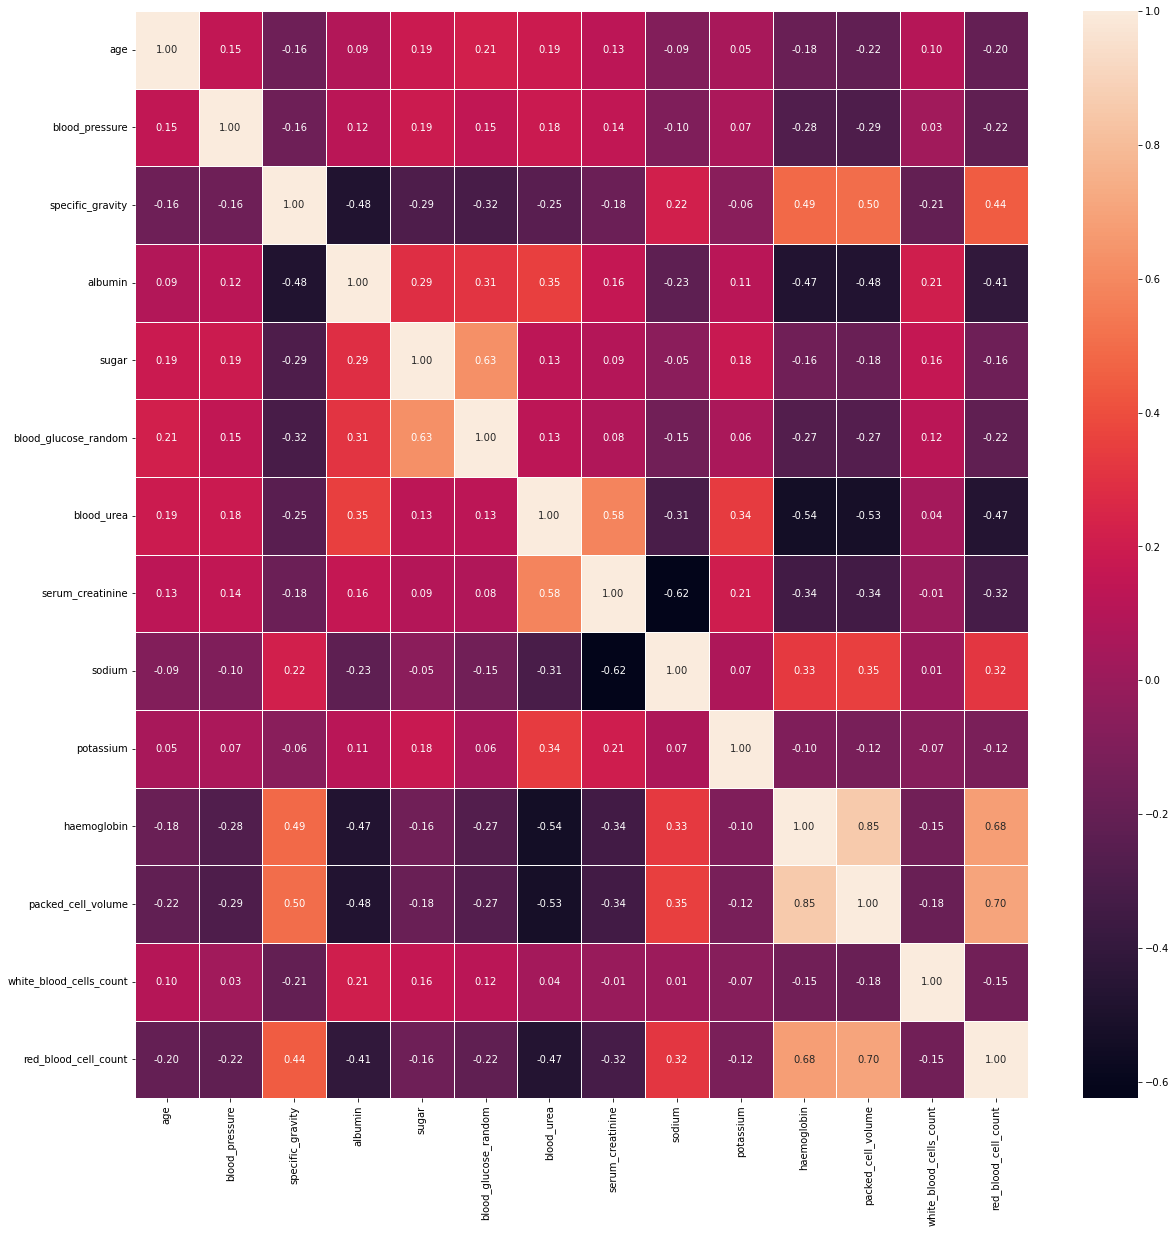

In [35]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(kidney_disease.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [36]:
kidney_disease.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cells_count,red_blood_cell_count
age,1.000000,0.146830,-0.161959,0.087907,0.185221,0.213779,0.190669,0.128292,-0.086552,0.049315,-0.182737,-0.217882,0.099872,-0.202618
blood_pressure,0.146830,1.000000,-0.164422,0.122541,0.190218,0.149100,0.183970,0.144359,-0.103220,0.066648,-0.279535,-0.292714,0.026067,-0.220822
specific_gravity,-0.161959,-0.164422,1.000000,-0.479962,-0.292053,-0.317893,-0.249370,-0.176146,0.217473,-0.063324,0.492143,0.501064,-0.206884,0.443741
albumin,0.087907,0.122541,-0.479962,1.000000,0.287751,0.310481,0.346935,0.160252,-0.228076,0.111614,-0.474211,-0.475165,0.207303,-0.411122
sugar,0.185221,0.190218,-0.292053,0.287751,1.000000,0.629809,0.126043,0.094565,-0.053452,0.180067,-0.156876,-0.181518,0.159034,-0.163871
blood_glucose_random,0.213779,0.149100,-0.317893,0.310481,0.629809,1.000000,0.127489,0.082242,-0.154393,0.056695,-0.269149,-0.267580,0.121371,-0.222568
blood_urea,0.190669,0.183970,-0.249370,0.346935,0.126043,0.127489,1.000000,0.581222,-0.307360,0.336979,-0.540641,-0.525982,0.041510,-0.465930
serum_creatinine,0.128292,0.144359,-0.176146,0.160252,0.094565,0.082242,0.581222,1.000000,-0.624491,0.205347,-0.342079,-0.341853,-0.005420,-0.323146
sodium,-0.086552,-0.103220,0.217473,-0.228076,-0.053452,-0.154393,-0.307360,-0.624491,1.000000,0.067449,0.333614,0.346817,0.006334,0.316956
potassium,0.049315,0.066648,-0.063324,0.111614,0.180067,0.056695,0.336979,0.205347,0.067449,1.000000,-0.100606,-0.123264,-0.074048,-0.120456


In [37]:
from sklearn.preprocessing import LabelEncoder
for i in cat_cols:
    ("LABEL ENCODING OF:",i)
    LEi=LabelEncoder()
    print(c(kidney_disease[i]))
    kidney_disease[i]=LEi.fit_transform(kidney_disease[i])
    print(c(kidney_disease[i]))
    print("*"*100)

Counter({38.88449848024316: 71, 52.0: 21, 41.0: 21, 44.0: 19, 48.0: 19, 40.0: 16, 43.0: 15, 45.0: 13, 42.0: 13, 32.0: 12, 36.0: 12, 33.0: 12, 28.0: 12, 50.0: 12, 37.0: 11, 34.0: 11, 35.0: 9, 29.0: 9, 30.0: 9, 46.0: 9, 31.0: 8, 39.0: 7, 24.0: 7, 26.0: 6, 38.0: 5, 47.0: 4, 49.0: 4, 53.0: 4, 51.0: 4, 54.0: 4, 27.0: 3, 22.0: 3, 25.0: 3, 23.0: 2, 19.0: 2, 16.0: 1, 14.0: 1, 18.0: 1, 17.0: 1, 15.0: 1, 21.0: 1, 20.0: 1, 9.0: 1})
Counter({26: 71, 40: 21, 29: 21, 32: 19, 36: 19, 28: 16, 31: 15, 33: 13, 30: 13, 19: 12, 23: 12, 20: 12, 15: 12, 38: 12, 24: 11, 21: 11, 22: 9, 16: 9, 17: 9, 34: 9, 18: 8, 27: 7, 11: 7, 13: 6, 25: 5, 35: 4, 37: 4, 41: 4, 39: 4, 42: 4, 14: 3, 9: 3, 12: 3, 10: 2, 6: 2, 3: 1, 1: 1, 5: 1, 4: 1, 2: 1, 8: 1, 7: 1, 0: 1})
****************************************************************************************************
Counter({'normal': 324, 'abnormal': 76})
Counter({1: 324, 0: 76})
*******************************************************************************************

## Data Splitting
# TRAIN AND TEST SET

In [38]:
selcols=['age','blood_urea','coronary_artery_disease','anemia','pus_cell','red_blood_cells',
         'diabetes_melitus','peda_edema']

x=pd.DataFrame(kidney_disease,columns=selcols)
y=pd.DataFrame(kidney_disease,columns=['classification'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


In [40]:
x_train

,age,blood_urea,coronary_artery_disease,anemia,pus_cell,red_blood_cells,diabetes_melitus,peda_edema
205,61.0,28.0,0,0,1,1,4,0
354,32.0,17.0,0,0,1,1,3,0
3,48.0,56.0,0,1,0,1,3,1
264,42.0,24.0,0,0,1,1,3,0
194,80.0,49.0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
299,73.0,48.0,0,0,1,1,3,0
22,48.0,163.0,0,1,0,1,3,0
72,64.0,35.0,0,0,0,1,4,1
15,40.0,162.0,0,1,1,1,3,0


In [41]:
y_train

,classification
205,0
354,1
3,0
264,1
194,0
...,...
299,1
22,0
72,0
15,0


## MODEL BUILDING

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver ='lbfgs',max_iter=500)
print('LogisticRegression\n')
model.fit(x_train.values,y_train.values.ravel())
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print('confusion_matrix')    
print(confusion_matrix(prediction,y_test))
print('\n')
print('accuracy_score')
print(accuracy_score(prediction,y_test))
print('\n')

LogisticRegression

confusion_matrix
[[50  0]
 [ 4 26]]


accuracy_score
0.95




/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train , y_train)
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print('RandomForest\n')
print('confusion_matrix')    
print(confusion_matrix(prediction,y_test))
print('\n')
print('accuracy_score')
print(accuracy_score(prediction,y_test))
print('\n')

RandomForest

confusion_matrix
[[51  1]
 [ 3 25]]


accuracy_score
0.95




/tmp/wsuser/ipykernel_165/2865502932.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train , y_train)


## Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
print('Decision tree\n')
model.fit(x_train , y_train)
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print('confusion_matrix')   
print(confusion_matrix(prediction,y_test))
print('\n')
print('accuracy_score')
print(accuracy_score(prediction,y_test))
print('\n')

Decision tree

confusion_matrix
[[52  4]
 [ 2 22]]


accuracy_score
0.925




# Deploy the Model in IBM cloud

In [52]:
!pip install ibm_watson_machine_learning

In [57]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "kmIiSq9J3IdSfiF09LKp5cwYnO_yyp1uIhlmc16UOiGm"
}
client = APIClient(wml_credentials)
client

In [58]:
def space_Name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [59]:
space_uid = space_Name(client, 'CKD')
print("space uid = " +space_uid)

space uid = 1097f0f9-6c3a-476e-9c99-64798525b5c2


In [60]:
client.set.default_space(space_uid)

'SUCCESS'

In [61]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [62]:
software_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [63]:
model_details = client.repository.store_model(model=model,meta_props={
 client.repository.ModelMetaNames.NAME:"chronic_kidney_disease",
 client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
 client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_uid }
                                          )
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [64]:
model_id

'46eb3bd9-dab8-4034-aa34-4b7a2ade40c9'

In [65]:
x_train.columns

Index(['age', 'blood_urea', 'coronary_artery_disease', 'anemia', 'pus_cell',
       'red_blood_cells', 'diabetes_melitus', 'peda_edema'],
      dtype='object')